In [1]:
# SQLAlchemy
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# Create an engine that can talk to the database
DB_URL = os.environ['DB_URL']
engine = create_engine(DB_URL)
conn = engine.connect()

In [3]:
# Query All Records in the the Database
employee_df = pd.read_sql("SELECT * FROM employees", conn)
salaries_df = pd.read_sql("SELECT * FROM salaries", conn)
titles_df = pd.read_sql("SELECT * FROM titles", conn)

In [4]:
employee_df = employee_df.rename(columns={'emp_title_id': 'title_id'})

In [5]:
employee_salary_df = employee_df.merge(salaries_df,on='emp_no')

In [6]:
employee_df.head()

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18


In [7]:
employee_salary_info_df = employee_salary_df.merge(titles_df,on='title_id')

In [8]:
employee_salary_info_df.head()

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date,salary,title
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000,Staff
1,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000,Staff
2,273487,s0001,1957-04-14,Christoph,Parfitt,M,1991-06-28,56087,Staff
3,246449,s0001,1958-03-23,Subbu,Bultermann,F,1988-03-25,87084,Staff
4,48085,s0001,1964-01-19,Venkatesan,Gilg,M,1993-06-28,63016,Staff


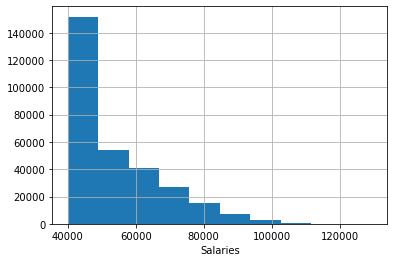

In [9]:
hist = employee_salary_info_df['salary'].hist()
hist = hist.set_xlabel("Salaries")

In [10]:
title_grouped_df = round(employee_salary_info_df.groupby("title")["salary"].mean(),2)


In [11]:
title_grouped_df.head()

title
Assistant Engineer    48564.43
Engineer              48535.34
Manager               51531.04
Senior Engineer       48506.80
Senior Staff          58550.17
Name: salary, dtype: float64

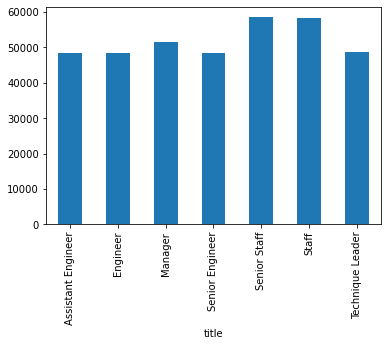

In [12]:
plt = title_grouped_df.plot.bar()